In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,8))

$Primera$ $Parte$

In [2]:
def oscilaciones(elementos,condicion):
    densidad=7850
    E=210E9
    Ltotal=1 #[m]
    area=10E-4
    I=10E-8 #Momento de Inercia
    
    numeronodos=elementos+1

    indexd=[0,1] #Indices del nodo 1, cero desplazamiento vertical y angular
    indexf=np.linspace(2,2*numeronodos-1,2*numeronodos-2).astype(int) #Nodos con fuerza conocida , f=0

    MN=np.linspace(0,Ltotal,numeronodos).reshape(-1,1)
    MN=np.hstack([MN,np.zeros_like(MN)])
 

    MC=np.zeros((numeronodos,2))
    a=-1
    b=0
    for i in range(elementos):
        a+=1
        b+=1
        MC[i,0]=a
        MC[i,1]=b

    MC=MC.astype(int) 

  

    K_global=np.zeros((2*numeronodos,2*numeronodos))
    M_global=np.zeros((2*numeronodos,2*numeronodos))
    L=Ltotal/elementos
    
    
    for i in range(elementos):

        #Matriz rigidez

        p,j = MC[i]
        K= np.array([[12, 6*L, -12, 6*L],
                           [6*L, 4*L**2, -6*L, 2*L**2],
                           [-12 , -6*L, 12, -6*L],
                           [6*L,2*L**2,-6*L, 4* L**2]])

        K_elemento = (E*I)/(L**3)*K

        index1 = np.array([p*2,p*2+1])
        index2 = np.array([j*2,j*2+1]) 
        index1_fix = np.array([0,1])
        index2_fix = np.array([2,3])

        K_global[np.ix_(index1,index1)] +=  K_elemento [np.ix_(index1_fix,index1_fix)]
        K_global[np.ix_(index2,index2)] +=  K_elemento [np.ix_(index2_fix,index2_fix)]
        K_global[np.ix_(index1,index2)] +=  K_elemento [np.ix_(index1_fix,index2_fix)]
        K_global[np.ix_(index2,index1)] +=  K_elemento [np.ix_(index2_fix,index1_fix)]


    
        if condicion==1:
            #Matriz de masa concentrada
            M_concentrada = np.array([[12, 0, 0, 0],
                               [0, L**2, 0, 0],
                               [0, 0, 12, 0],
                               [0, 0, 0, L**2]])

            coef=(densidad*area*L)/24
            M_concentrada_elemento = coef*M_concentrada

            index1 = np.array([p*2,p*2+1])
            index2 = np.array([j*2,j*2+1]) 
            index1_fix = np.array([0,1])
            index2_fix = np.array([2,3])

            M_global[np.ix_(index1,index1)] +=  M_concentrada_elemento[np.ix_(index1_fix,index1_fix)]
            M_global[np.ix_(index2,index2)] +=  M_concentrada_elemento[np.ix_(index2_fix,index2_fix)]
            M_global[np.ix_(index1,index2)] +=  M_concentrada_elemento[np.ix_(index1_fix,index2_fix)]
            M_global[np.ix_(index2,index1)] +=  M_concentrada_elemento[np.ix_(index2_fix,index1_fix)]
            
        elif condicion==0:
            #Matriz de masa consistente
            M_consistente = np.array([[156,22*L, 54*L, -13*L],
                               [22*L,4*L**2, 13*L, -3*L**2],
                               [54,13*L, 156, -22*L],
                               [-13*L,-3*L**2, -22*L, 4*L**2]])

            coef=(densidad*area*L)/420
            M_consistente_elemento = coef*M_consistente

            index1 = np.array([p*2,p*2+1])
            index2 = np.array([j*2,j*2+1]) 
            index1_fix = np.array([0,1])
            index2_fix = np.array([2,3])

            M_global[np.ix_(index1,index1)] +=  M_consistente_elemento [np.ix_(index1_fix,index1_fix)]
            M_global[np.ix_(index2,index2)] +=  M_consistente_elemento[np.ix_(index2_fix,index2_fix)]
            M_global[np.ix_(index1,index2)] +=  M_consistente_elemento[np.ix_(index1_fix,index2_fix)]
            M_global[np.ix_(index2,index1)] +=  M_consistente_elemento[np.ix_(index2_fix,index1_fix)]
            


    from scipy.linalg import eigh

    w,u=eigh(K_global[np.ix_(indexf,indexf)],M_global[np.ix_(indexf,indexf)])

    frecuencia=np.sqrt(w)/(2*np.pi)
    
    u1=np.vstack([np.zeros((2,2*(numeronodos-1))),u])

    u_normalizado=u1/u1[2*numeronodos-2,:]
    

    return frecuencia,u_normalizado

$Segunda$ $Parte$

In [3]:
x=np.linspace(3,10,7).astype(int)
lenx=len(x)

f1consist=[]
f2consist=[]    
f3consist=[]    
f1concen=[]
f2concen=[]
f3concen=[]
for i in range(3,10):    
     #obtengo las frecuencias de los primeros tres modos
    f1consist.append(oscilaciones(i,0)[0][0])
    f2consist.append(oscilaciones(i,0)[0][1])  
    f3consist.append(oscilaciones(i,0)[0][2])
    f1concen.append(oscilaciones(i,1)[0][0])
    f2concen.append(oscilaciones(i,1)[0][1])  
    f3concen.append(oscilaciones(i,1)[0][2])

$Tercera$ $Parte$

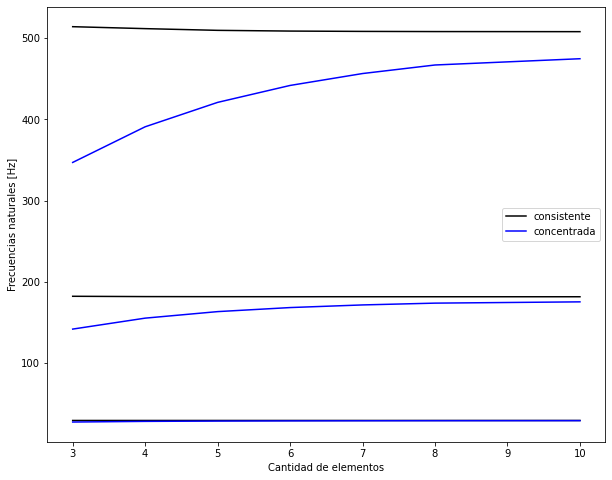

<Figure size 720x432 with 0 Axes>

In [4]:
#consistente        
plt.plot(x,f1consist,'k', label='consistente')
plt.plot(x,f2consist,'k')
plt.plot(x,f3consist,'k')
#concentrado
plt.plot(x,f1concen,'b', label='concentrada')
plt.plot(x,f2concen,'b')
plt.plot(x,f3concen,'b')

plt.legend(loc = 'center right')
plt.ylabel('Frecuencias naturales [Hz]')
plt.xlabel('Cantidad de elementos')

plt.figure(figsize=(10,6))
plt.show()    

In [5]:
f1consist

[28.94607696893859,
 28.94409051741736,
 28.94353512860369,
 28.943333466060388,
 28.943246497691874,
 28.943204131727185,
 28.943181530067726]

In [6]:
f1concen

[27.00873189353907,
 27.816123169374308,
 28.209841515243845,
 28.429286735225457,
 28.563547526149453,
 28.651480609194124,
 28.71213086273221]

Text(0, 0.5, 'Desplazamientos normalizados')

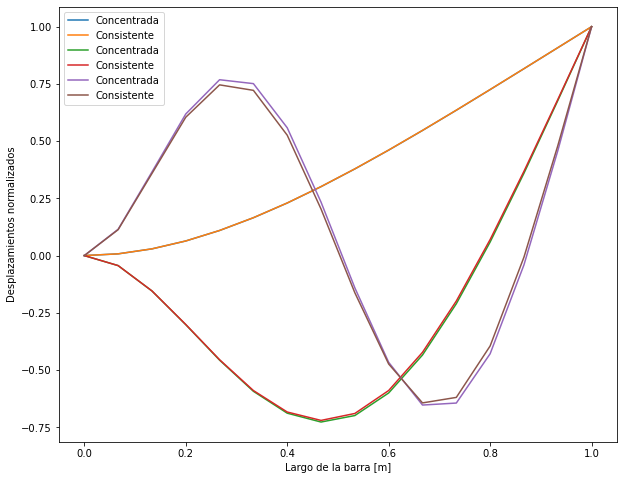

In [7]:
elementos=15
x=np.linspace(0,1,elementos+1)
for i in range(3):
    plt.plot(x,oscilaciones(15,1)[-1][::2][:,i], label='Concentrada')
    plt.plot(x,oscilaciones(15,0)[-1][::2][:,i], label='Consistente')
plt.legend()
plt.xlabel('Largo de la barra [m]')
plt.ylabel('Desplazamientos normalizados')